# Za Bezigrad

In [2]:
import pandas as pd
from csv import DictReader
from csv import StringIO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [34]:
data = pd.read_csv("podatki/bezigrad.txt")


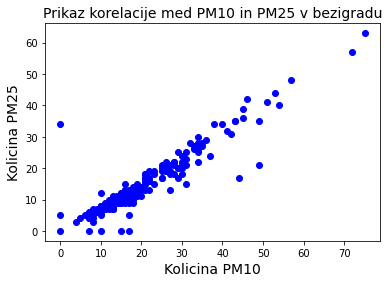

In [35]:
plt.xlabel('Kolicina PM10', fontsize=14)
plt.ylabel('Kolicina PM25', fontsize=14)
plt.scatter(data['PM10bezigrad'], data['PM25bezigrad'], color='blue')
plt.title('Prikaz korelacije med PM10 in PM25 v bezigradu', fontsize=14)
plt.show()

Med PM10 in PM25 je močna korelacija kot pričakovano.

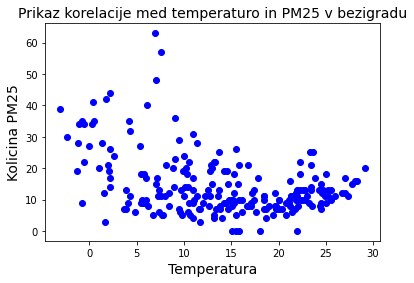

In [5]:
plt.xlabel('Temperatura', fontsize=14)
plt.ylabel('Kolicina PM25', fontsize=14)
plt.scatter(data['povpdnevnaT'], data['PM25bezigrad'], color='blue')
plt.title('Prikaz korelacije med temperaturo in PM25 v bezigradu', fontsize=14)
plt.show()

Korelacija med temperaturo in onesnaženostjo je precej očitna. Po moje je temu tako zaradi ogrevanja.

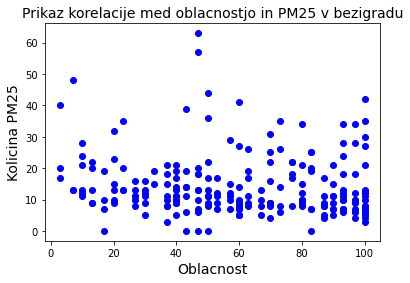

In [6]:
plt.xlabel('Oblacnost', fontsize=14)
plt.ylabel('Kolicina PM25', fontsize=14)
plt.scatter(data['oblacnost'], data['PM25bezigrad'], color='blue')
plt.title('Prikaz korelacije med oblacnostjo in PM25 v bezigradu', fontsize=14)
plt.show()

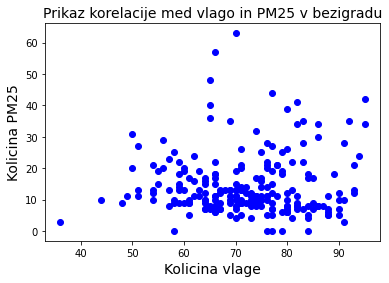

In [7]:
plt.xlabel('Kolicina vlage', fontsize=14)
plt.ylabel('Kolicina PM25', fontsize=14)
plt.scatter(data['povpvlaga'], data['PM25bezigrad'], color='blue')
plt.title('Prikaz korelacije med vlago in PM25 v bezigradu', fontsize=14)
plt.show()

Med količino vlage in oblačnostjo iz grafov ne morem razbrati očitne korelacije.

Text(0, 0.5, 'Število dni')

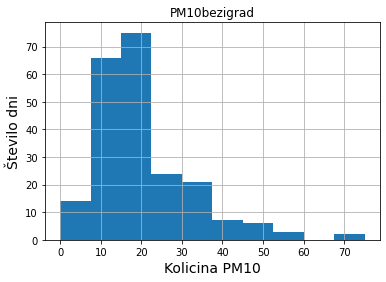

In [8]:
df = pd.DataFrame(data=data)
df.hist(column='PM10bezigrad')
plt.xlabel('Kolicina PM10', fontsize=14)
plt.ylabel('Število dni', fontsize=14)

Text(0, 0.5, 'Število dni')

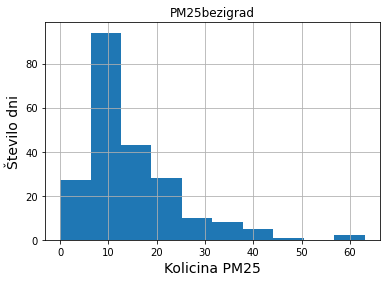

In [9]:
df = pd.DataFrame(data=data)
df.hist(column='PM25bezigrad')
plt.xlabel('Kolicina PM25', fontsize=14)
plt.ylabel('Število dni', fontsize=14)


c:\users\jakob\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\jakob\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\jakob\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x285B78F8>,
      dtype=object)

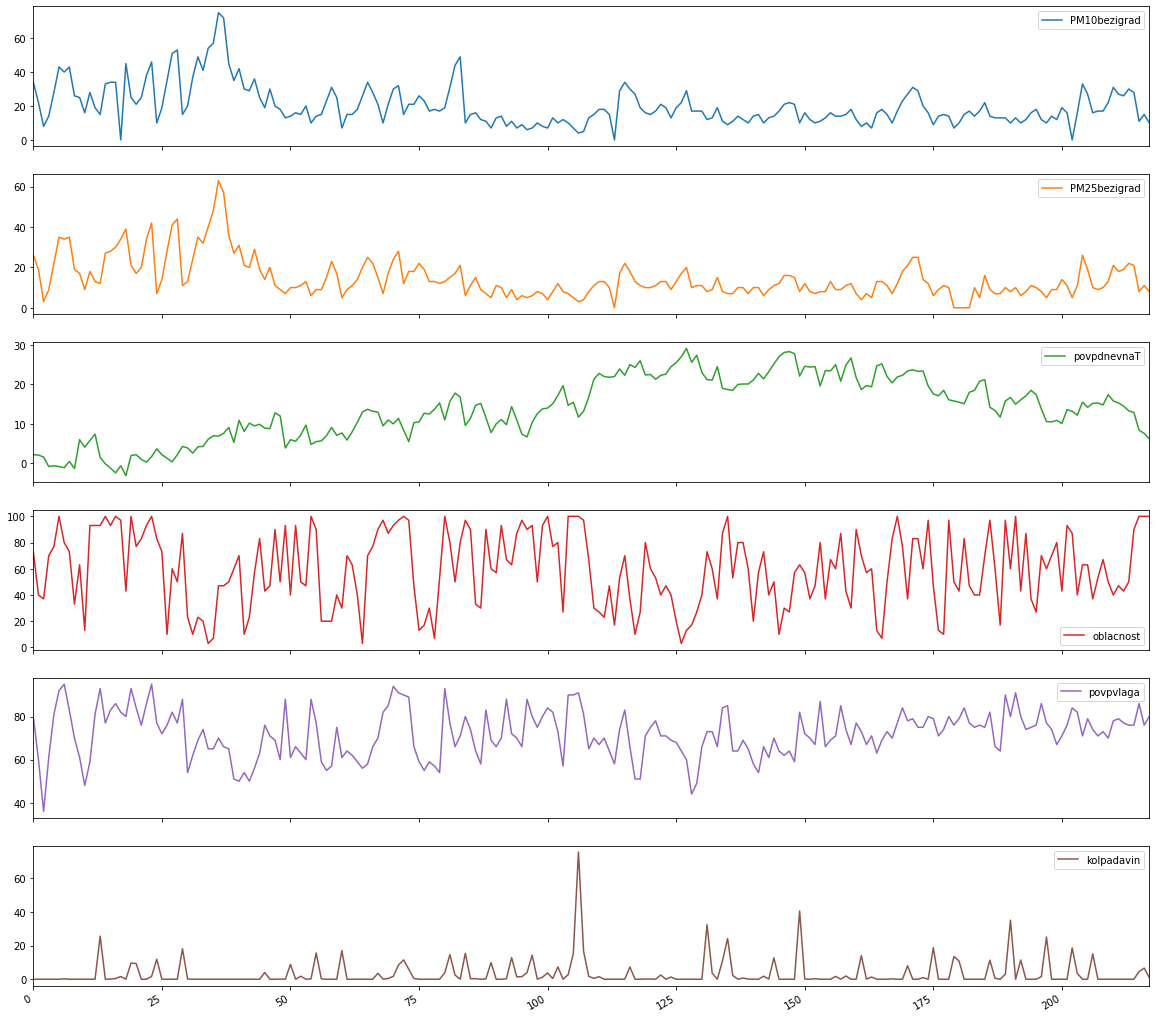

In [10]:
df.plot.line(subplots=True,figsize=(20,20))

In [11]:
df.loc[df['PM10bezigrad']>60]

,datum,PM10bezigrad,PM25bezigrad,povpdnevnaT,oblacnost,povpvlaga,kolpadavin,padavine
36,20.02.2019,75.0,63,6.9,47,70,0.0,ne
37,21.02.2019,72.0,57,7.6,47,66,0.0,ne


20.2 in 21.2 sta osamelca. Takrat je bila onesnaženost največja

In [13]:
df.loc[df['PM10bezigrad']>50]

,datum,PM10bezigrad,PM25bezigrad,povpdnevnaT,oblacnost,povpvlaga,kolpadavin,padavine
27,7.02.2019,51.0,41,0.4,60,82,0.0,ne
28,8.02.2019,53.0,44,2.2,50,77,0.0,ne
34,18.02.2019,54.0,40,6.1,3,65,0.0,ne
35,19.02.2019,57.0,48,7.0,7,65,0.0,ne
36,20.02.2019,75.0,63,6.9,47,70,0.0,ne
37,21.02.2019,72.0,57,7.6,47,66,0.0,ne


In [19]:
df.loc[(df['PM10bezigrad']<10) & (df['PM10bezigrad'] != 0) & (df['PM25bezigrad'] != 0)]

,datum,PM10bezigrad,PM25bezigrad,povpdnevnaT,oblacnost,povpvlaga,kolpadavin,padavine
2,3.01.2019,8.0,3,1.6,37,36,0.0,ne
60,26.03.2019,7.0,5,7.7,30,61,17.0,da
89,6.05.2019,7.0,5,7.8,60,69,9.9,da
92,9.05.2019,8.0,5,9.8,67,88,0.3,da
94,13.05.2019,7.0,4,11.0,87,70,1.4,da
95,14.05.2019,9.0,6,7.4,97,66,1.5,da
96,15.05.2019,6.0,5,6.7,90,88,4.0,da
97,16.05.2019,7.0,6,10.4,93,80,14.3,da
99,20.05.2019,8.0,7,13.8,93,80,1.2,da
100,21.05.2019,7.0,4,14.0,100,84,3.7,da


V maju je bila v Bežigradu najmanjša onesnaženost.

# Splosno

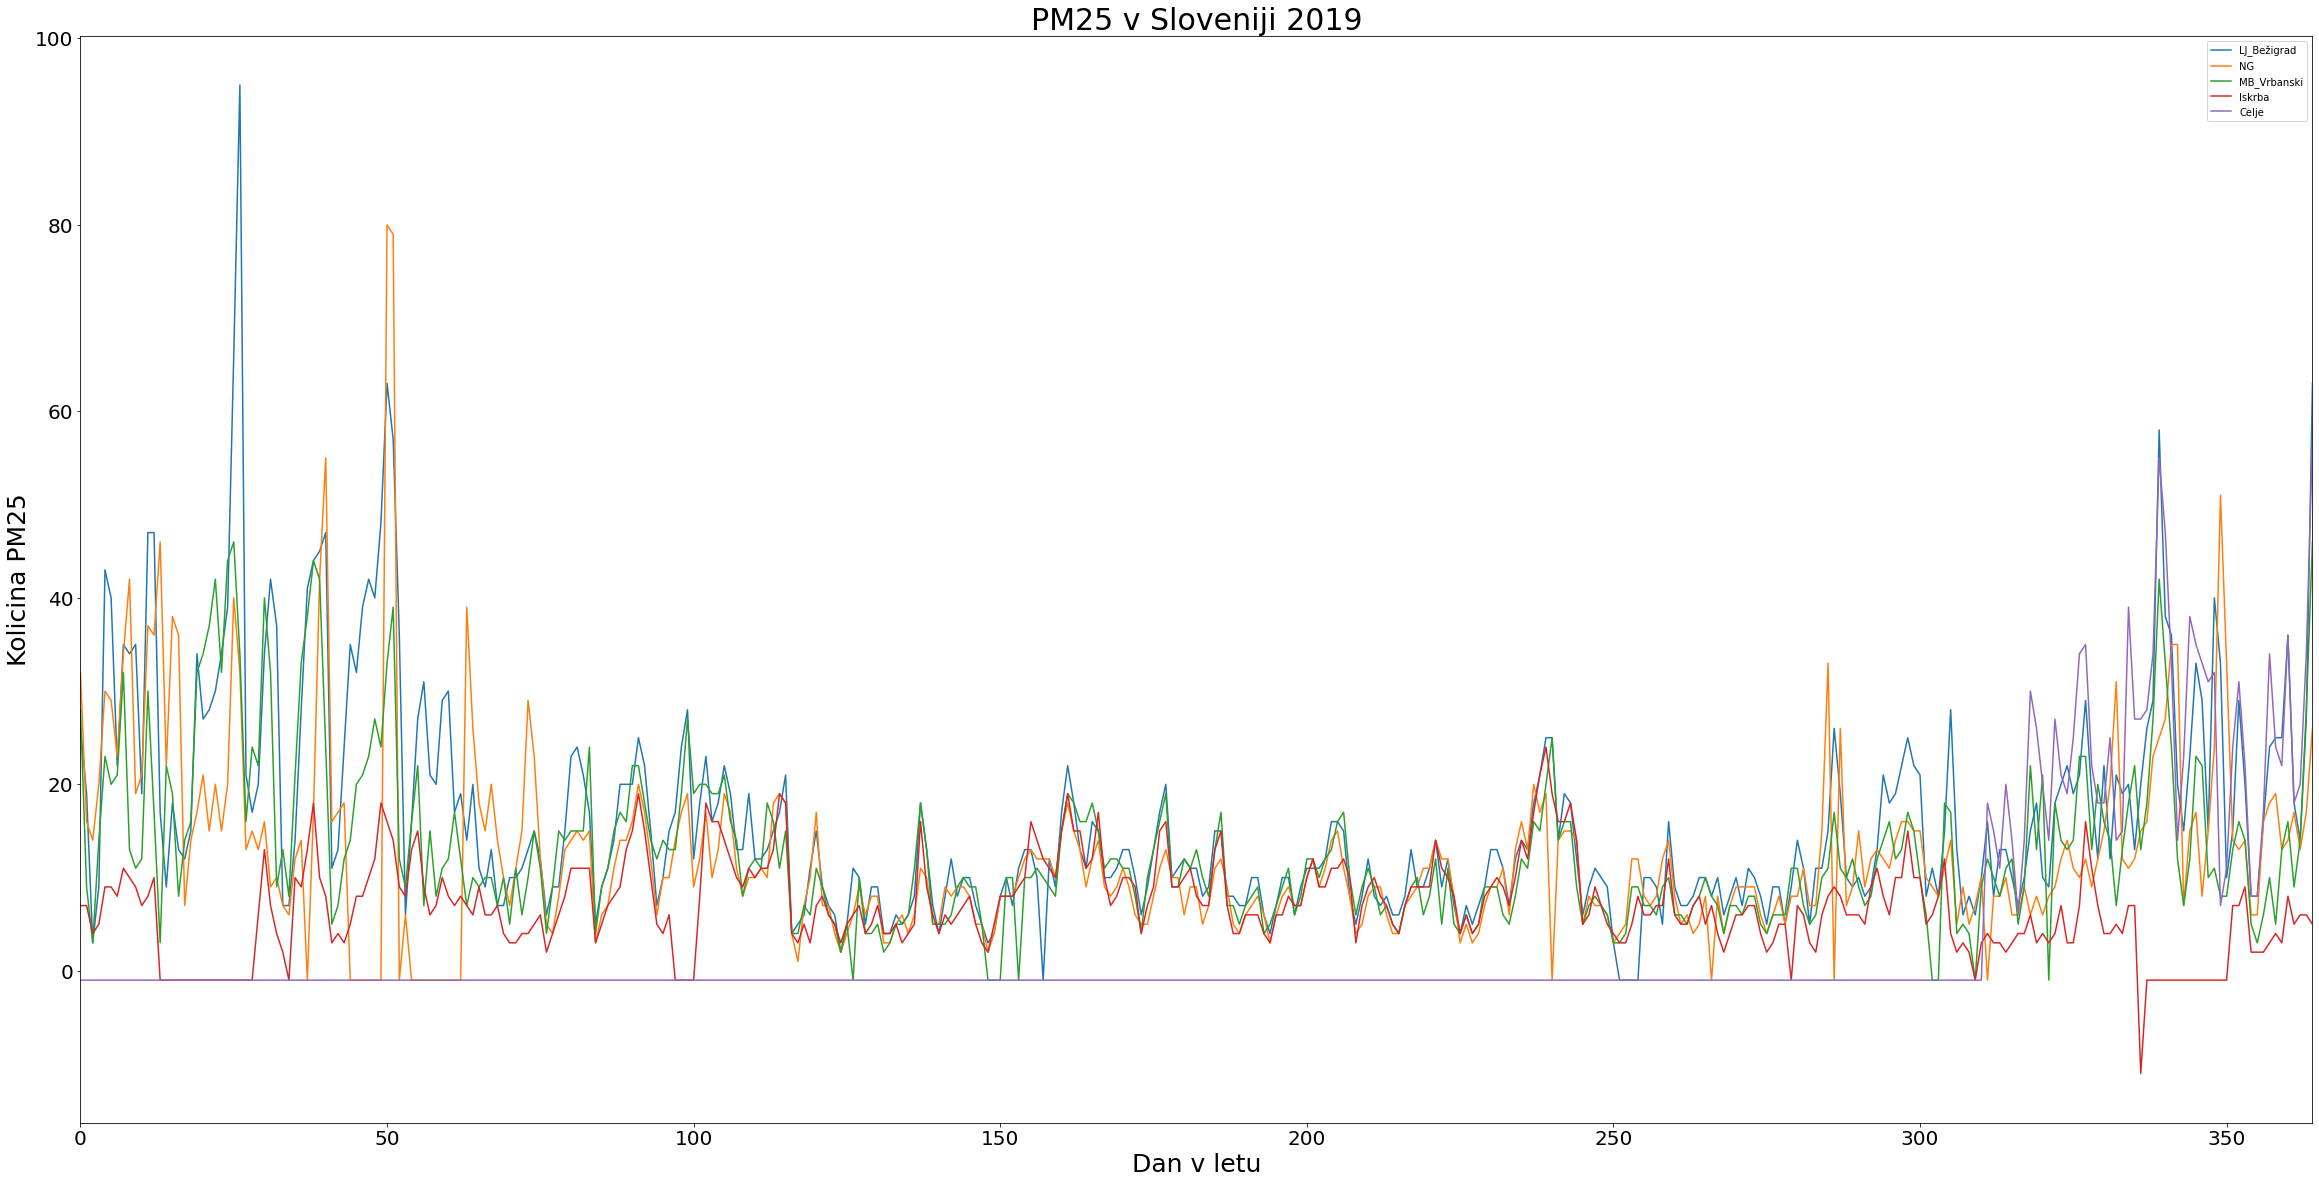

In [61]:
data = pd.read_csv("podatki/PM2.5_2019aljosa.csv")
df = pd.DataFrame(data=data)
df.plot.line(figsize=(40,20))
plt.ylabel('Kolicina PM25', fontsize=25)
plt.xlabel('Dan v letu', fontsize=25)
plt.title('PM25 v Sloveniji 2019', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)

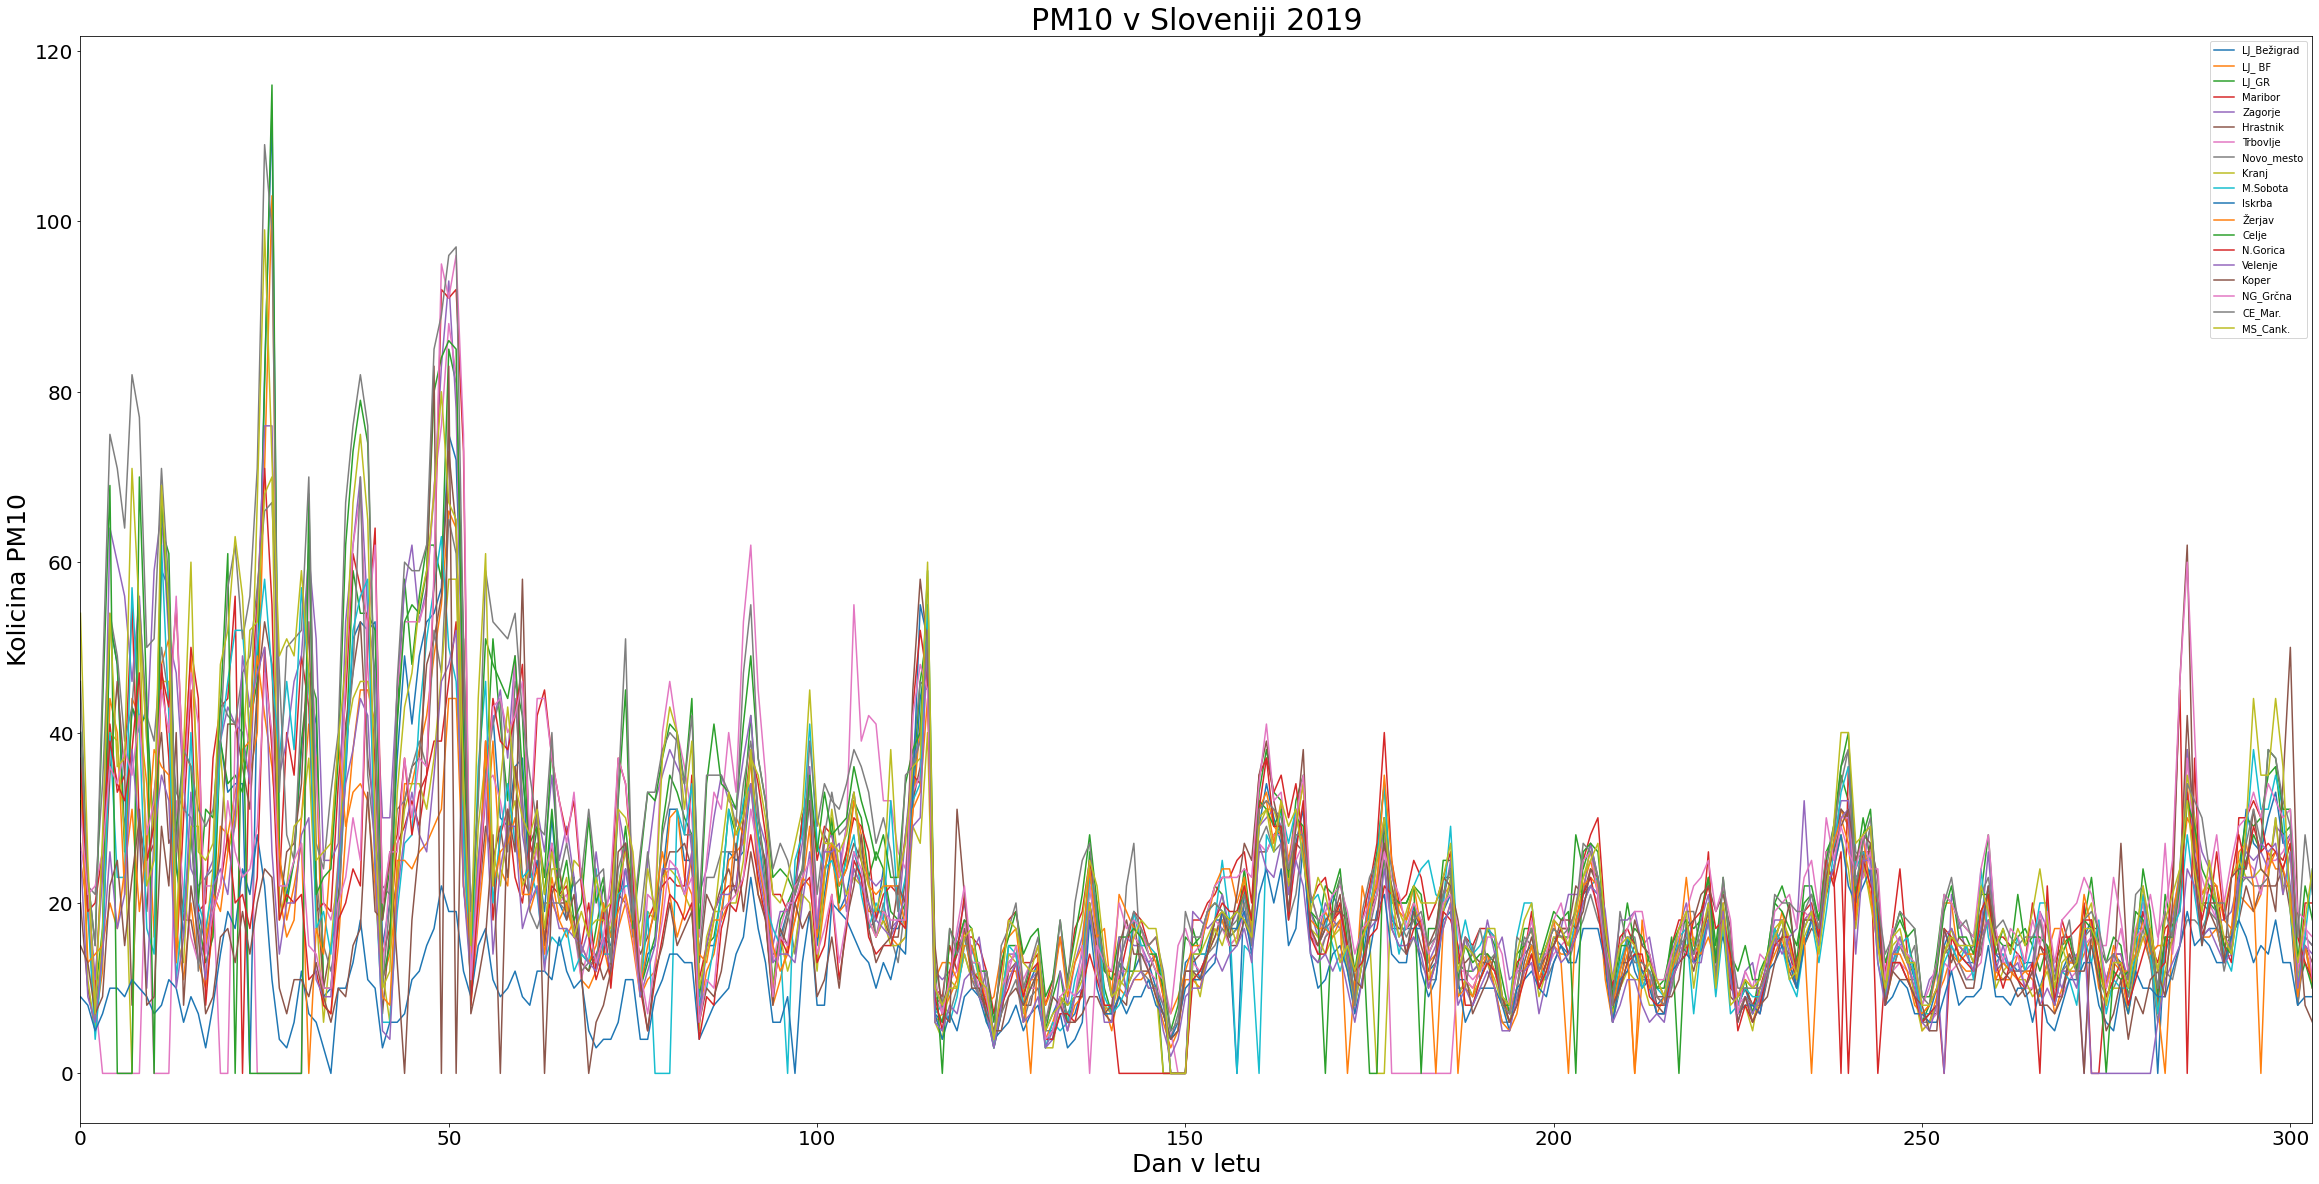

In [62]:
data = pd.read_csv("podatki/pm10_2019aljosa.csv")
df = pd.DataFrame(data=data)
df.plot.line(figsize=(40,20))
plt.ylabel('Kolicina PM10', fontsize=25)
plt.xlabel('Dan v letu', fontsize=25)
plt.title('PM10 v Sloveniji 2019', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)

S teh grafov je razvidno, da je po celi sloveniji podobna onesnaženost saj so si vse črte na grafu podobne in zelo blizu.

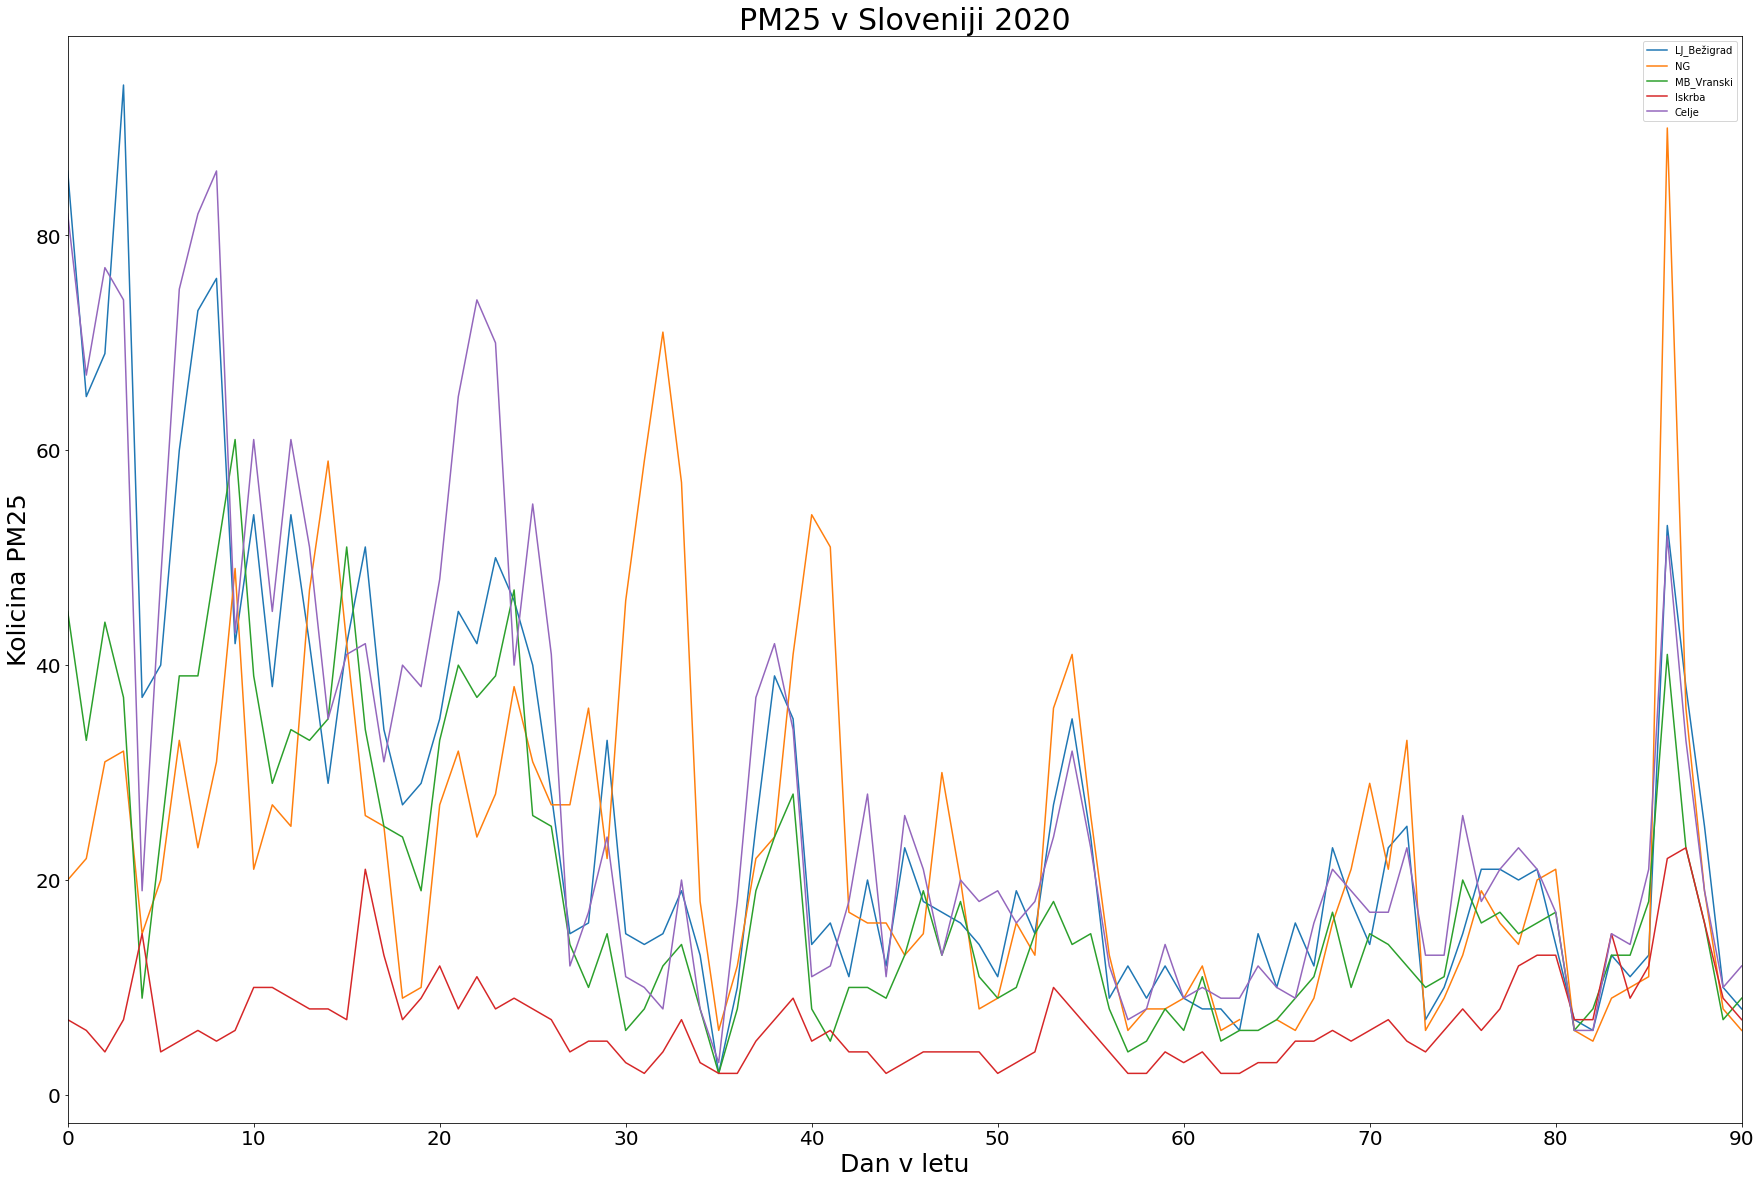

In [63]:
data = pd.read_csv("podatki/PM2.5_2020aljosa.csv")
df = pd.DataFrame(data=data)
df.plot.line(figsize=(30,20))
plt.ylabel('Kolicina PM25', fontsize=25)
plt.xlabel('Dan v letu', fontsize=25)
plt.title('PM25 v Sloveniji 2020', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)

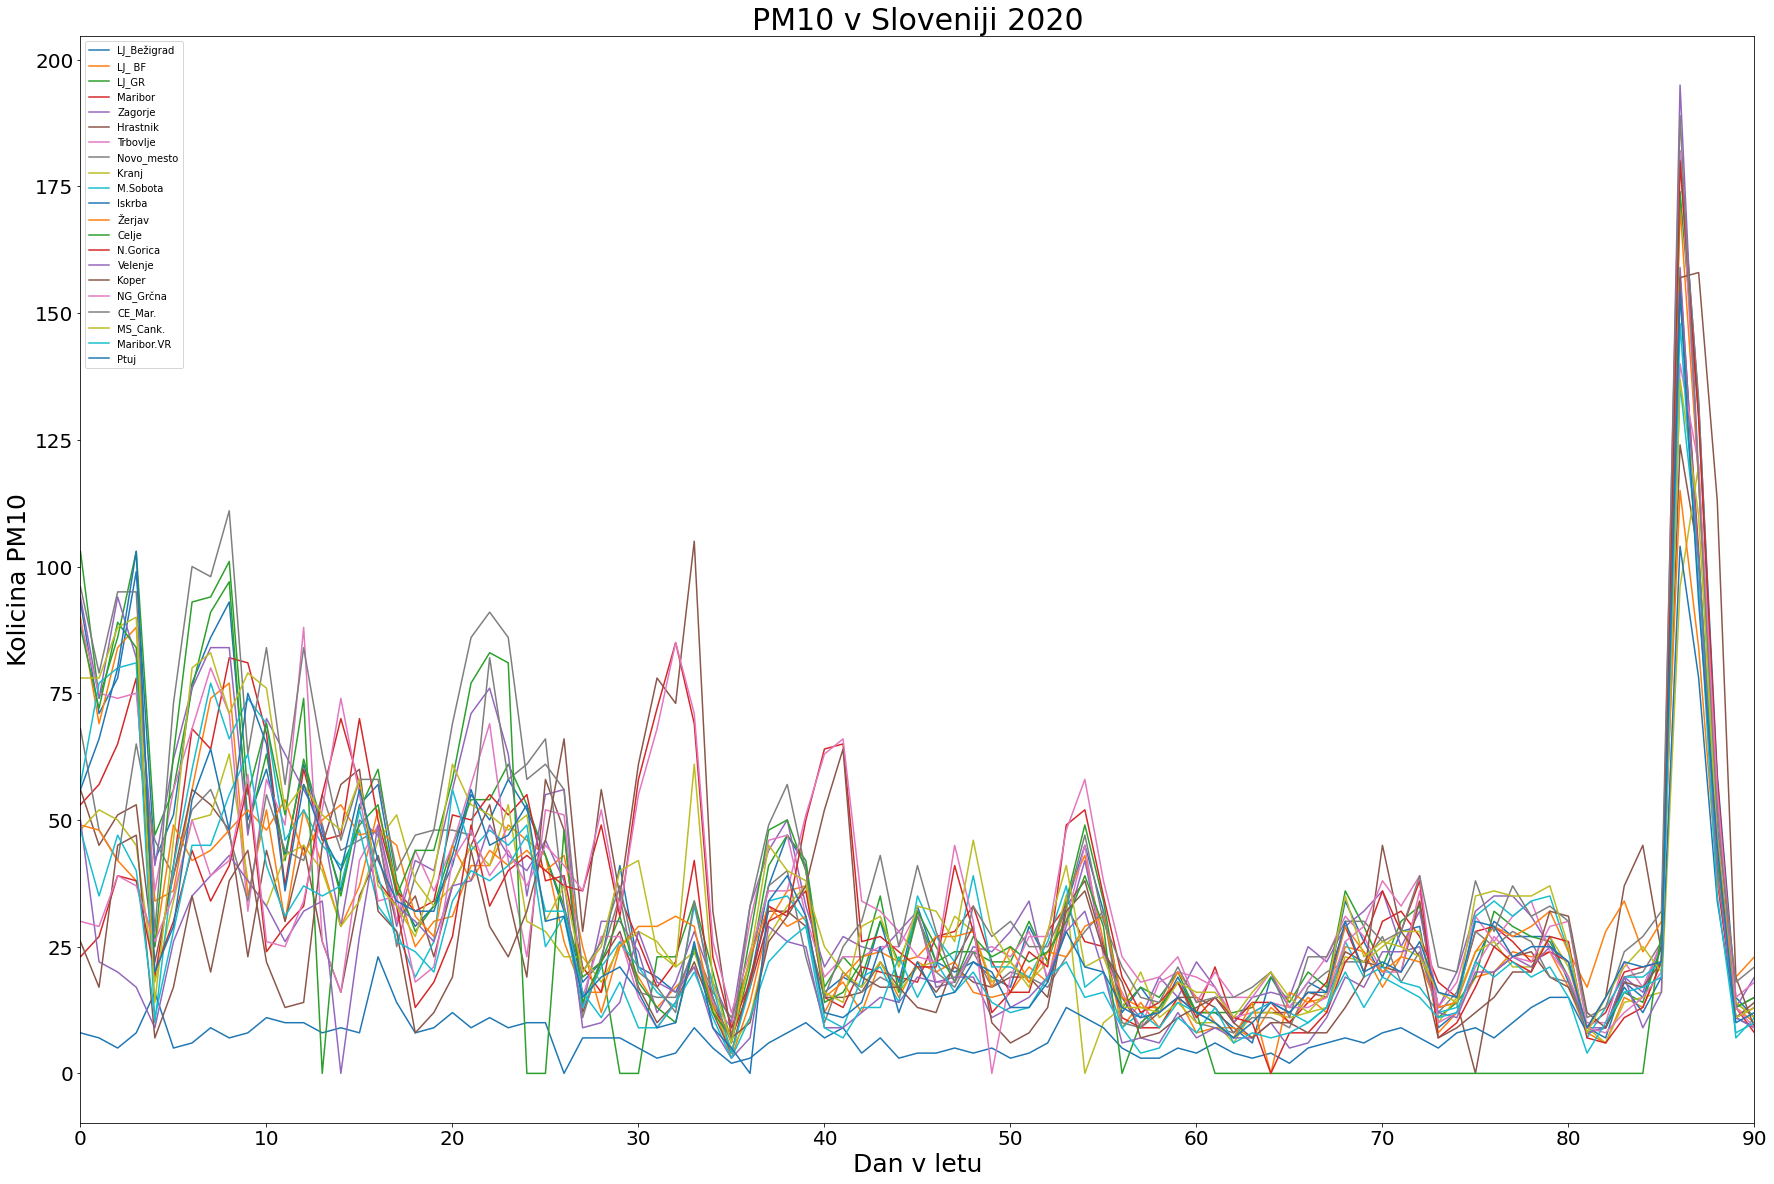

In [64]:
data = pd.read_csv("podatki/pm10_2020aljosa.csv")
df = pd.DataFrame(data=data)
df.plot.line(figsize=(30,20))
plt.ylabel('Kolicina PM10', fontsize=25)
plt.xlabel('Dan v letu', fontsize=25)
plt.title('PM10 v Sloveniji 2020', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)

Marca 2020 je onesnaženost poskočila skoraj na 200 µg/m³ medtem ko lani niti enkrat v letu ni bilo izmerjenih nad 100 µg/m³ PM10